# Analysing Tweets with the Hashtag **"#قاسم_سليماني"** (Qasem Soleimani in Arabic/Persian) Posted between 3 and 31 January 2020

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import itertools
from typing import Iterable, Tuple
%matplotlib inline

In [2]:
plt.style.use('seaborn')

## Loading Arabic and Persian tweets

In [3]:
df_ar = pd.read_csv("Data/tweets_ar_classified.csv").sort_values(by='date')
df_fa = pd.read_csv("Data/tweets_fa_classified.csv").sort_values(by='date')

## Comparing the number of tweets posted in each language

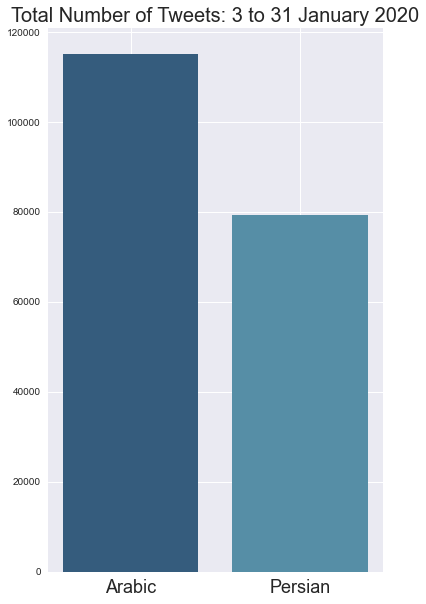

In [4]:
plt.figure(figsize=(6,10))
plt.bar(['Arabic', 'Persian'], [len(df_ar), len(df_fa)], color=['#355c7d', '#568ea6'])
plt.xticks(fontsize=18)
plt.title('Total Number of Tweets: 3 to 31 January 2020', fontsize = 20);

In [5]:
df_ar_op = df_ar[df_ar['sentiment'] == 'O']
df_ar_op.reset_index(drop=True, inplace=True)

df_ar_su = df_ar[df_ar['sentiment'] == 'S']
df_ar_su.reset_index(drop=True, inplace=True)

df_ar_neu = df_ar[df_ar['sentiment'] == 'N']
df_ar_neu.reset_index(drop=True, inplace=True)

df_fa_op = df_fa[df_fa['sentiment'] == 'O']
df_fa_op.reset_index(drop=True, inplace=True)

df_fa_su = df_fa[df_fa['sentiment'] == 'S']
df_fa_su.reset_index(drop=True, inplace=True)

df_fa_neu = df_fa[df_fa['sentiment'] == 'N']
df_fa_neu.reset_index(drop=True, inplace=True)

## The percentage of tweets that oppose, support or are neutral about the assassination

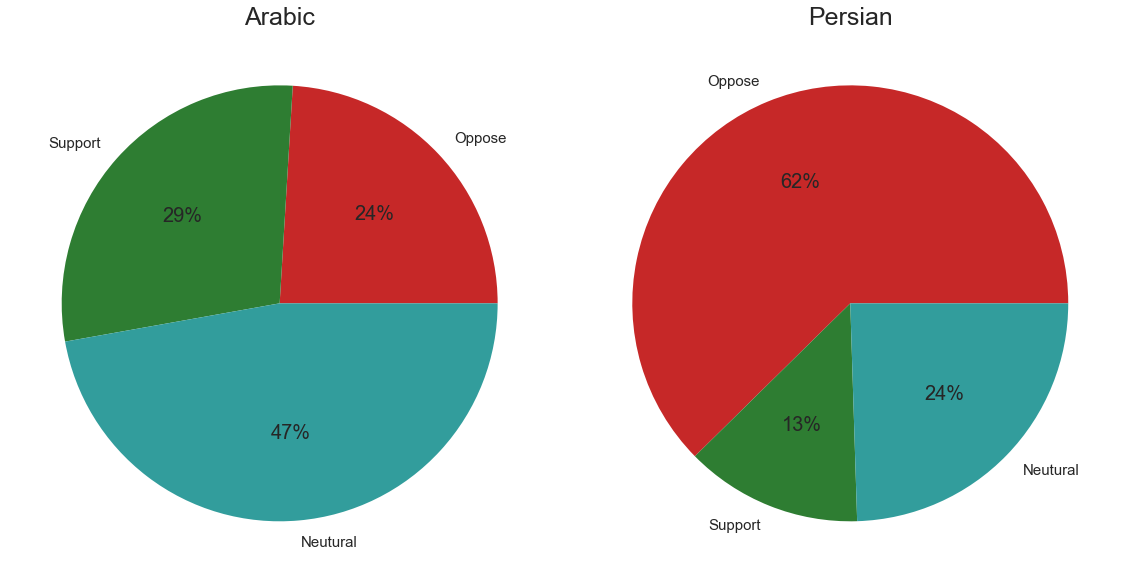

In [6]:
colors=['#c62828', '#2e7d32', '#329d9c']
labels=['Oppose','Support','Neutural']
plt.rcParams['axes.labelsize'] = 20
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
pieWedgesCollection1 = ax1.pie([len(df_ar_op), len(df_ar_su), len(df_ar_neu)], labels=labels, colors=colors,autopct='%.0f%%')
for l, p in zip(pieWedgesCollection1[1], pieWedgesCollection1[2]):
    l.set_fontsize(15)
    p.set_fontsize(20)
pieWedgesCollection2 = ax2.pie([len(df_fa_op), len(df_fa_su), len(df_fa_neu)],labels=labels, colors=colors,autopct='%.0f%%')
for l, p in zip(pieWedgesCollection2[1], pieWedgesCollection2[2]):
    l.set_fontsize(15)
    p.set_fontsize(20)
ax1.set_title("Arabic",fontsize=25)
ax2.set_title('Persian',fontsize=25)

fig.tight_layout()
plt.show();

## A breakdown of the number of users and their sentiments

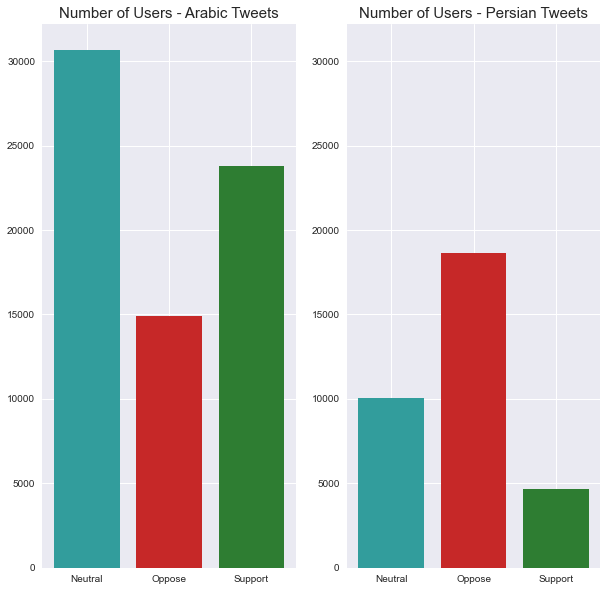

In [7]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1, 2, 1)
labels = ['Neutral', 'Oppose', 'Support']
colors = ['#329d9c', '#c62828', '#2e7d32']
user_ar = pd.DataFrame(df_ar.groupby('sentiment')['username'].unique().apply(len))
ax1.bar(labels, user_ar.username, color=colors)
ax1.set_title("Number of Users - Arabic Tweets", fontsize = 15)
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
user_fa = pd.DataFrame(df_fa.groupby('sentiment')['username'].unique().apply(len))
ax2.bar(labels, user_fa.username, color=colors)
ax2.set_title("Number of Users - Persian Tweets", fontsize = 15)
plt.show();

## Breakdown of how users interacted with the tweets

In [8]:
df_ar_op.loc[:, 'day'] = pd.to_datetime(df_ar_op.loc[:, 'date']).dt.day
df_ar_su.loc[:, 'day'] = pd.to_datetime(df_ar_su.loc[:, 'date']).dt.day
df_ar_neu.loc[:, 'day'] = pd.to_datetime(df_ar_neu.loc[:, 'date']).dt.day
df_fa_op.loc[:, 'day'] = pd.to_datetime(df_fa_op.loc[:, 'date']).dt.day
df_fa_su.loc[:, 'day'] = pd.to_datetime(df_fa_su.loc[:, 'date']).dt.day
df_fa_neu.loc[:, 'day'] = pd.to_datetime(df_fa_neu.loc[:, 'date']).dt.day

C:\Users\laura\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\laura\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
df_ar_op[['date', 'day']]

date  day
0      2020-01-01 22:40:43    1
1      2020-01-02 16:00:40    2
2      2020-01-02 19:21:59    2
3      2020-01-02 23:55:50    2
4      2020-01-03 00:27:12    3
...                    ...  ...
27667  2020-01-31 14:38:54   31
27668  2020-01-31 14:50:11   31
27669  2020-01-31 15:07:46   31
27670  2020-01-31 15:29:10   31
27671  2020-01-31 16:31:44   31

[27672 rows x 2 columns]

In [10]:
op_tw_freq_ar = {dt : len(df_ar_op[df_ar_op['day'] == dt]) for dt in df_ar_op['day'].unique() if dt > 2}
su_tw_freq_ar = {dt : len(df_ar_su[df_ar_su['day'] == dt]) for dt in df_ar_su['day'].unique() if dt > 2}
neu_tw_freq_ar = {dt : len(df_ar_neu[df_ar_neu['day'] == dt]) for dt in df_ar_neu['day'].unique() if dt > 2}
op_tw_freq_fa = {dt : len(df_fa_op[df_fa_op['day'] == dt]) for dt in df_fa_op['day'].unique() if dt > 2}
su_tw_freq_fa = {dt : len(df_fa_su[df_fa_su['day'] == dt]) for dt in df_fa_su['day'].unique() if dt > 2}
neu_tw_freq_fa = {dt : len(df_fa_neu[df_fa_neu['day'] == dt]) for dt in df_fa_neu['day'].unique() if dt > 2}

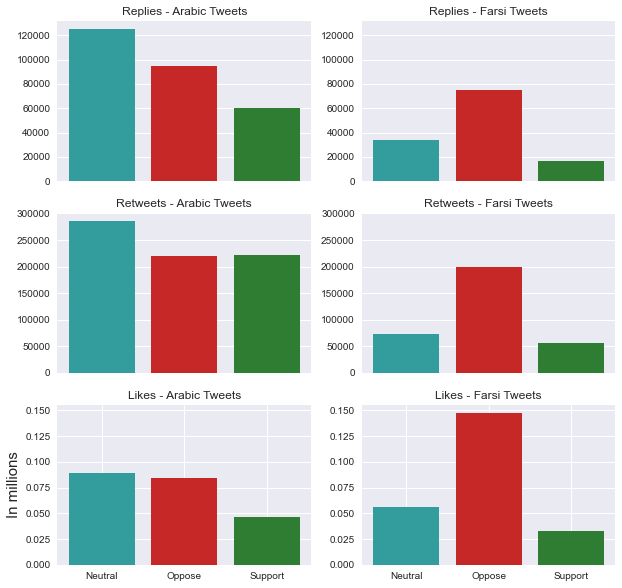

In [11]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(3, 2, 1)
labels = ['Neutral', 'Oppose', 'Support']
colors = ['#329d9c', '#c62828', '#2e7d32']
rep_ar = pd.DataFrame(df_ar.groupby('sentiment')['replies'].sum())
ax1.bar(labels, rep_ar.replies, color=colors)
ax1.set_title("Replies - Arabic Tweets")
ax2 = plt.subplot(3, 2, 2, sharey = ax1)
rep_fa = pd.DataFrame(df_fa.groupby('sentiment')['replies'].sum())
ax2.bar(labels, rep_fa.replies, color=colors)
ax2.set_title("Replies - Farsi Tweets")
ax3 = plt.subplot(3, 2, 3)
ret_ar = pd.DataFrame(df_ar.groupby('sentiment')['retweets'].sum())
ax3.bar(labels, ret_ar.retweets, color=colors)
ax3.set_title("Retweets - Arabic Tweets")
ax4 = plt.subplot(3, 2, 4, sharey = ax3)
ret_fa = pd.DataFrame(df_fa.groupby('sentiment')['retweets'].sum())
ax4.bar(labels, ret_fa.retweets, color=colors)
ax4.set_title("Retweets - Farsi Tweets")
ax5 = plt.subplot(3, 2, 5)
l_ar = pd.DataFrame(df_ar.groupby('sentiment')['favorites'].sum())
ax5.bar(labels, l_ar.favorites/10000000, color=colors)
ax5.set_ylabel('In millions', fontsize = 15)
ax5.set_title("Likes - Arabic Tweets")
ax6 = plt.subplot(3, 2, 6, sharey = ax5)
l_fa = pd.DataFrame(df_fa.groupby('sentiment')['favorites'].sum())
ax6.bar(labels, l_fa.favorites/10000000, color=colors)
ax6.set_title("Likes - Farsi Tweets");
for a in [ax1, ax2, ax3, ax4]:
    a.set_xticks([])
plt.show();

## How major news and events affected the sentiments of users, represented in percentages

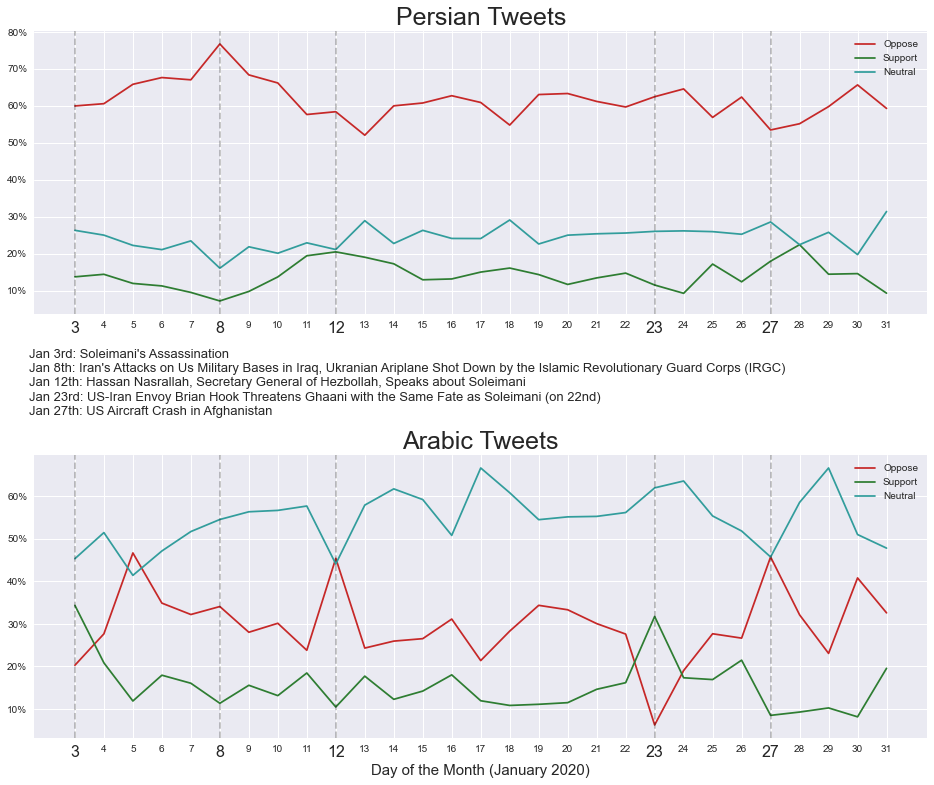

In [12]:
total_fa = np.array([op_tw_freq_fa[i] + su_tw_freq_fa[i] + neu_tw_freq_fa[i] for i in range(3,32)])
total_ar = np.array([op_tw_freq_ar[i] + su_tw_freq_ar[i] + neu_tw_freq_ar[i] for i in range(3,32)])
op_fa = np.array(list(op_tw_freq_fa.values())) / total_fa
su_fa = np.array(list(su_tw_freq_fa.values())) / total_fa
neu_fa = np.array(list(neu_tw_freq_fa.values())) / total_fa
op_ar = np.array(list(op_tw_freq_ar.values())) / total_ar
su_ar = np.array(list(su_tw_freq_ar.values())) / total_ar
neu_ar = np.array(list(neu_tw_freq_ar.values())) / total_ar

fig,(ax,ax2) = plt.subplots(2, 1, figsize=(16,13))

xvals = list(op_tw_freq_fa.keys())
fa_op = ax.plot(xvals, op_fa, color='#c62828', label='Oppose')
fa_su = ax.plot(xvals, su_fa, color='#2e7d32', label='Support')
fa_neu = ax.plot(xvals, neu_fa, color='#329d9c', label='Neutral')

ax.xaxis.set_ticks(xvals)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title('Persian Tweets', fontsize=25)
ax.legend()

ax2.plot(xvals, op_ar, color='#c62828', label='Oppose')
ax2.plot(xvals, su_ar, color='#2e7d32', label='Support')
ax2.plot(xvals, neu_ar, color='#329d9c', label='Neutral')
ax2.xaxis.set_ticks(xvals)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax2.set_title('Arabic Tweets', fontsize=25)
ax2.set_xlabel('Day of the Month (January 2020)', fontsize = 15)
for a in (ax, ax2):
    ticks = a.xaxis.get_major_ticks()
    for i in [0, 5, 9, 20, 24]:
        ticks[i].label.set_fontsize(16)
        #ticks[i].label.set_color('red')
ax2.legend()

for i in [3, 8, 12, 23, 27]:
    ax.axvline(x=i, color='k', linestyle='--', alpha=0.25)
    ax2.axvline(x=i, color='k', linestyle='--', alpha = 0.25)

fig.subplots_adjust(hspace=0.5)

txt = """Jan 3rd: Soleimani's Assassination
Jan 8th: Iran's Attacks on Us Military Bases in Iraq, Ukranian Ariplane Shot Down by the Islamic Revolutionary Guard Corps (IRGC)
Jan 12th: Hassan Nasrallah, Secretary General of Hezbollah, Speaks about Soleimani
Jan 23rd: US-Iran Envoy Brian Hook Threatens Ghaani with the Same Fate as Soleimani (on 22nd)
Jan 27th: US Aircraft Crash in Afghanistan"""

plt.figtext(0.12, 0.47, txt, fontsize = 13)
plt.show();

## How major news and events affected the sentiments of users, represented in number of tweets

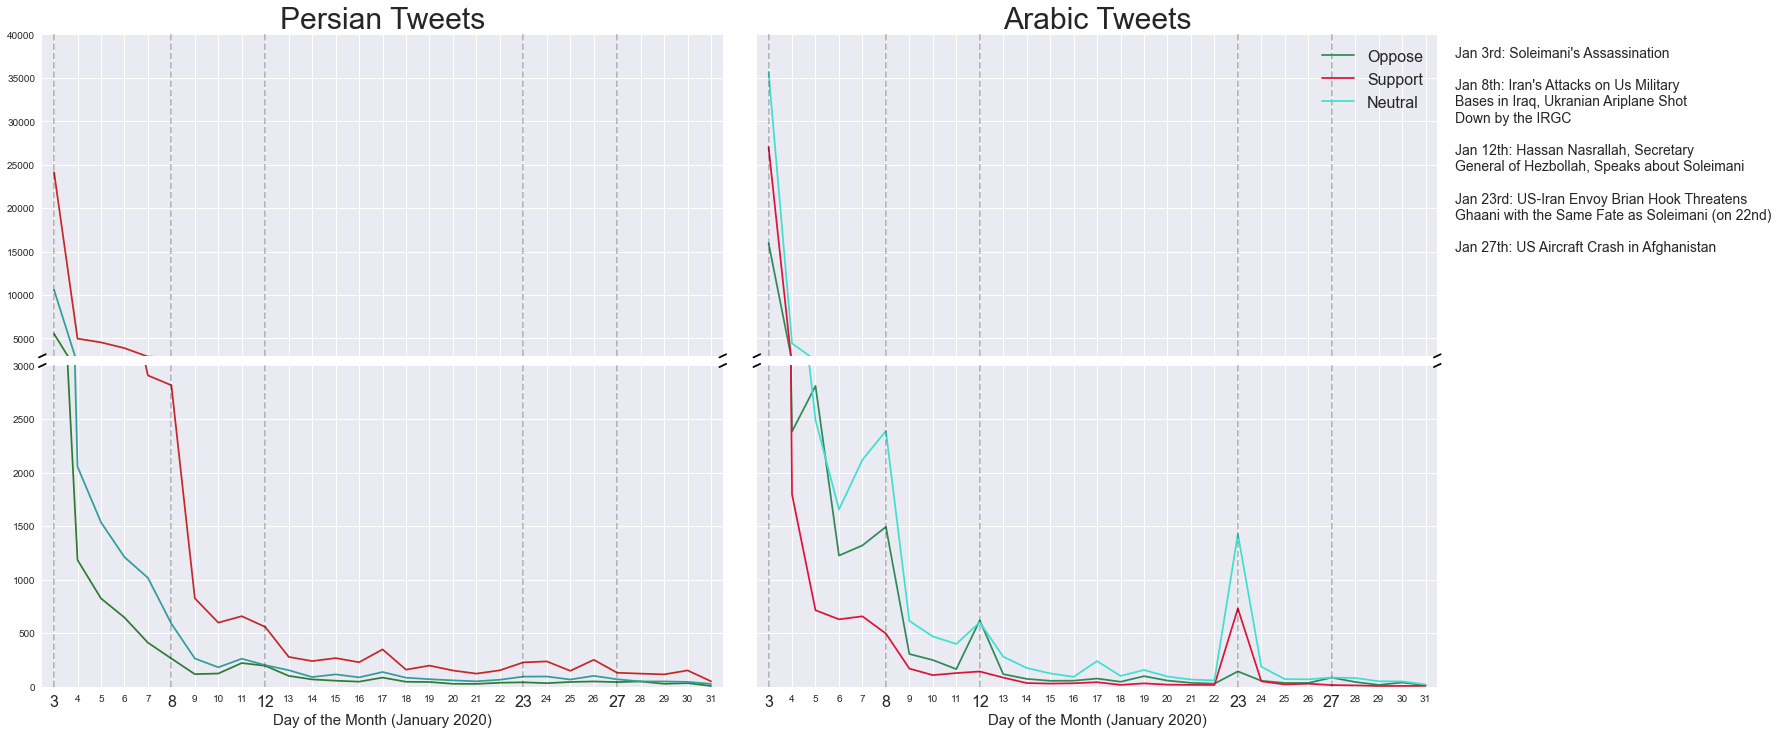

In [13]:
plt.figure(figsize=(25,12))
plt.subplots_adjust(hspace=0.03, wspace=0.05)

xvals = list(op_tw_freq_fa.keys())
opfa = list(op_tw_freq_fa.values())
sufa = list(su_tw_freq_fa.values())
neufa = list(neu_tw_freq_fa.values())

ax1 = plt.subplot(2, 2, 1)
ax1.plot(xvals, opfa, color='#c62828')
ax1.plot(xvals, sufa, color='#2e7d32')
ax1.plot(xvals, neufa, color='#329d9c')
ax1.xaxis.set_ticks(xvals)


ax2 = plt.subplot(2, 2, 3, sharex = ax1)
ax2.plot(xvals, opfa, color='#c62828')
ax2.plot(xvals, sufa, color='#2e7d32')
ax2.plot(xvals, neufa, color='#329d9c')
ax2.xaxis.set_ticks(xvals)

ax1.set(xlim=(2.5,31.5))
ax1.set_ylim(3000, 40000)  # outliers only
ax2.set_ylim(0, 3000)  # most of the data


plt.setp(ax1.get_xticklabels(), visible=False)
fig.text(0.1, 0.5, 'Number of Tweets', fontsize = 15, va='center', rotation='vertical')
ax2.set_xlabel('Day of the Month (January 2020)', fontsize = 15)
ax1.set_title('Persian Tweets', fontsize = 30)

opar = list(op_tw_freq_ar.values())
suar = list(su_tw_freq_ar.values())
neuar = list(neu_tw_freq_ar.values())

ax3 = plt.subplot(2, 2, 2)
ax3.plot(xvals, opar, color='seagreen', label='Oppose')
ax3.plot(xvals, suar, color='crimson', label='Support')
ax3.plot(xvals, neuar, color='Turquoise', label='Neutral')
ax3.legend(fontsize=16, loc='upper right')
ax3.xaxis.set_ticks(xvals)

ax4 = plt.subplot(2, 2, 4, sharex = ax3)
ax4.plot(xvals, opar, color='seagreen')
ax4.plot(xvals, suar, color='crimson')
ax4.plot(xvals, neuar, color='Turquoise')
ax4.xaxis.set_ticks(xvals)

ax3.set(xlim=(2.5,31.5))
ax3.set_ylim(3000, 40000)  # outliers only
ax4.set_ylim(0, 3000)  # most of the data

d = 0.005  # how big to make the diagonal lines in axes
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False) # top left axes
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom left axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the top right axes
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax4.transAxes)  # switch to the bottom right axes
ax4.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax4.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

for a in [ax1, ax2, ax3, ax4]:
    for i in [3, 8, 12, 23, 27]:
        a.axvline(x=i, color='k', linestyle='--', alpha=0.25)
        
for a in (ax2, ax4):
    ticks = a.xaxis.get_major_ticks()
    for i in [0, 5, 9, 20, 24]:
        ticks[i].label.set_fontsize(16)

fig.text(0.1, 0.5, 'Number of Tweets', fontsize = 15, va='center', rotation='vertical')
ax4.set_xlabel('Day of the Month (January 2020)', fontsize = 15)
ax3.set_title('Arabic Tweets', fontsize = 30)

txt = """
Jan 3rd: Soleimani's Assassination

Jan 8th: Iran's Attacks on Us Military
Bases in Iraq, Ukranian Ariplane Shot 
Down by the IRGC

Jan 12th: Hassan Nasrallah, Secretary 
General of Hezbollah, Speaks about Soleimani

Jan 23rd: US-Iran Envoy Brian Hook Threatens 
Ghaani with the Same Fate as Soleimani (on 22nd)

Jan 27th: US Aircraft Crash in Afghanistan
"""

plt.figtext(0.91, 0.61, txt, fontsize = 14)

plt.show();

## Breakdown of most frequently used words by language and sentiment

In [14]:
text = " ".join(review for review in df_ar_op['cleaned_text'])
stop_ar = stopwords.words('arabic')
stop_ar = stop_ar + ['و', 'قاسم', 'سليماني', 'ان', 'الى', '..', '.', '،', ':', 'او', 'ل', 'قبل', '...', 'اي', '|', '"', 'Soleimani', '!', '؟', '?', '!!', 'الله', 'العراق', 'ايران']

In [15]:
def top_words_dict(txt: str, stop_words:list) -> dict:
    top_words = {}
    for w in txt.split():
        if w in stop_words:
            continue
        elif w not in top_words:
            top_words[w] = 1
        else:
            top_words[w] += 1
    return {k: v for k, v in sorted(top_words.items(), key=lambda item: item[1], reverse = True)}

In [16]:
top_words = top_words_dict(txt=text, stop_words=stop_ar)

In [17]:
def take(n: int, iterable: Iterable) -> list:
    "Return first n items of the iterable as a list."
    return list(itertools.islice(iterable, n))
for_wc = take(400, top_words.items())

In [18]:
def reshape_data(l: list) -> dict:
    """
    Arguments:
    l: a list of touples of lenght 2: (word, frequency)
    
    Connects Arabic/Persian letters and reshape them from right to left
    
    'reshape' is imported from 'arabic_reshaper' module and connects the letters
    'get_display' is imported from bidi.algorithm and reshape the letters right to left
    
    return a dictionary of words and frequencies.
    """
    return {get_display(reshape(t[0])) : t[1] for t in l}
    

In [19]:
dic_data = reshape_data(for_wc)

In [20]:
 def plot_wordCloud(color: str, font_path: str, language:str, sentiment:str, data:dict, size:Tuple[int, int]=(16,8), title_size: int =30) -> None:
        wc = WordCloud(background_color=color, width=1600, height=800,max_words=400, font_path=font_path).generate_from_frequencies(data)
        plt.figure(figsize=size)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'{language} Tweets - {sentiment} the Assassination', fontsize = title_size)
        plt.show();

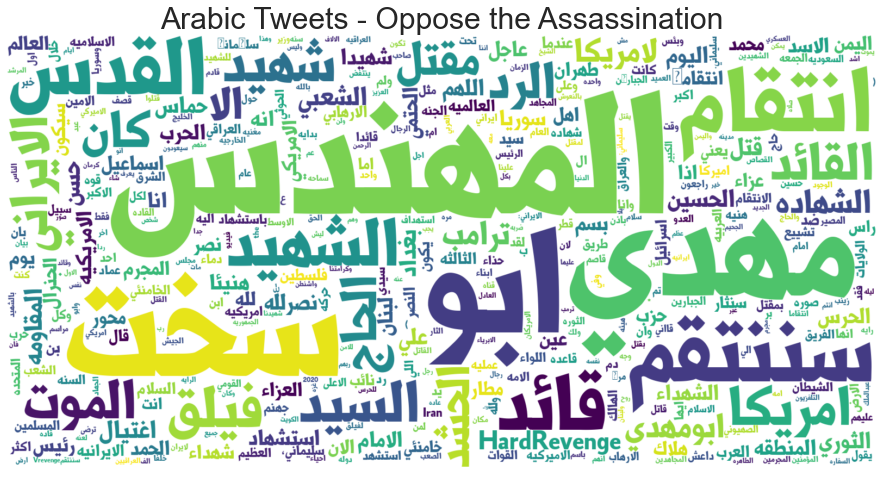

In [21]:
plot_wordCloud(color="white", font_path='Data/fonts/Shoroq.ttf', language='Arabic', sentiment='Oppose', data=dic_data)

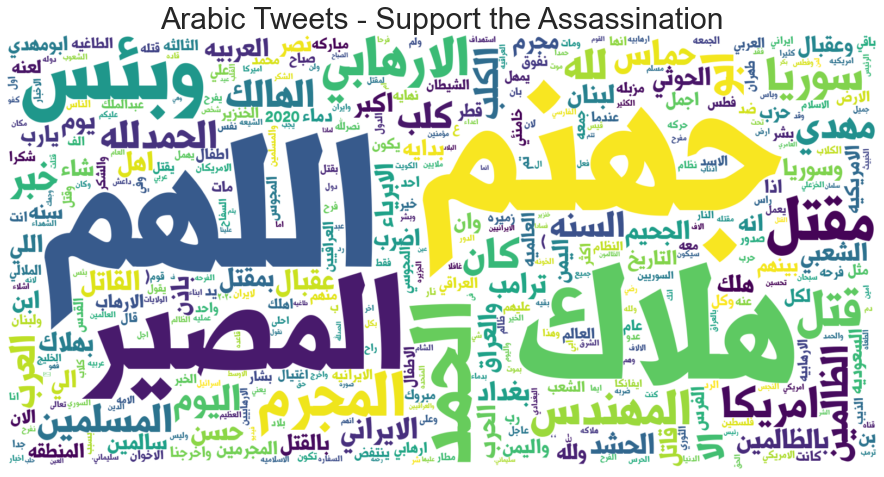

In [22]:
text = " ".join(review for review in df_ar_su['cleaned_text'])
top_words = top_words_dict(txt=text, stop_words=stop_ar)
for_wc = take(400, top_words.items())
dic_data = reshape_data(for_wc)
plot_wordCloud(color="white", font_path='Data/fonts/Shoroq.ttf', language='Arabic', sentiment='Support', data=dic_data)

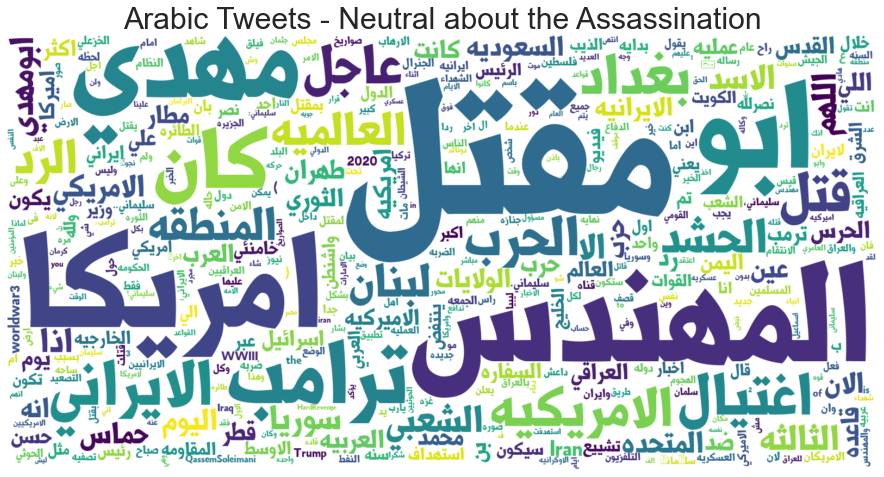

In [23]:
text = " ".join(review for review in df_ar_neu['cleaned_text'])
top_words = top_words_dict(txt=text, stop_words=stop_ar)
for_wc = take(400, top_words.items())
dic_data = reshape_data(for_wc)
plot_wordCloud(color="white", font_path='Data/fonts/Shoroq.ttf', language='Arabic', sentiment='Neutral about', data=dic_data)

In [24]:
stop_fa = open('Data/persian.txt', 'r', encoding="utf8").read().split()
stop_fa += ['سلیمانی', 'soleimani']

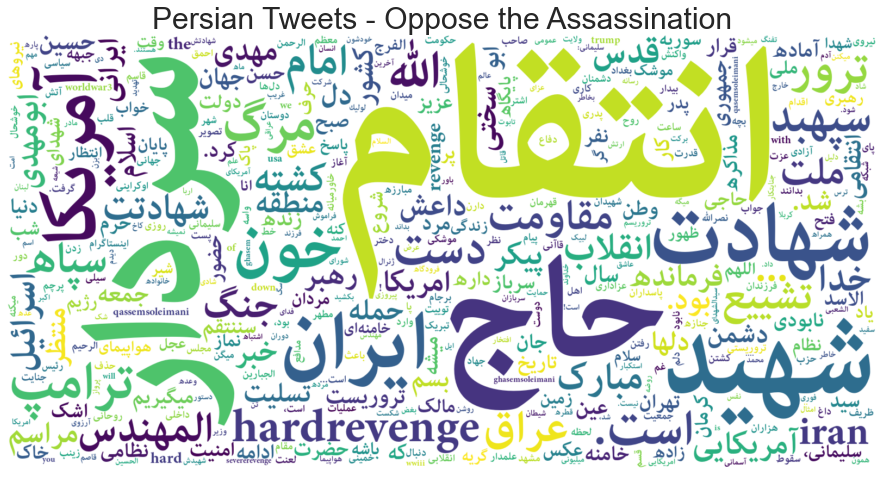

In [25]:
text = " ".join(review for review in df_fa_op['cleaned_text'])
top_words = top_words_dict(txt=text, stop_words=stop_fa)
for_wc = take(400, top_words.items())
dic_data = reshape_data(for_wc)
plot_wordCloud(color="white", font_path='Data/fonts/adobe-arabic/AdobeArabic-Bold.otf', language='Persian', sentiment='Oppose', data=dic_data)

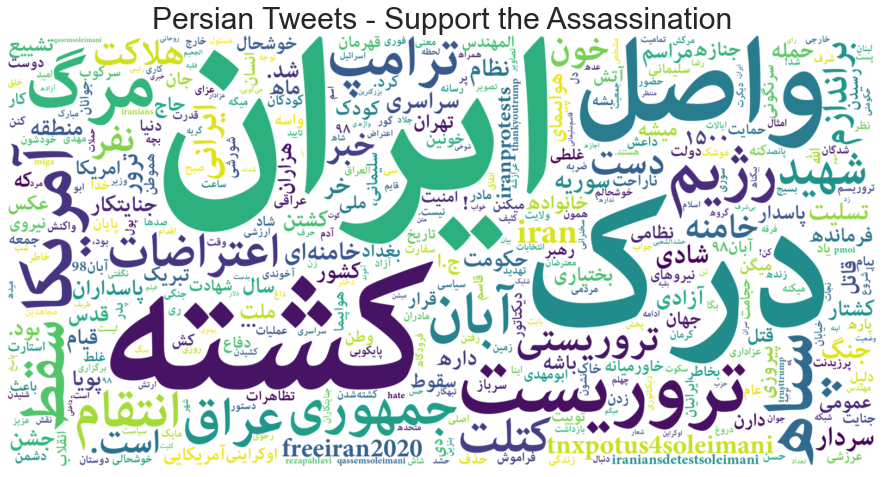

In [26]:
text = " ".join(review for review in df_fa_su['cleaned_text'])
top_words = top_words_dict(txt=text, stop_words=stop_fa)
for_wc = take(400, top_words.items())
dic_data = reshape_data(for_wc)
plot_wordCloud(color="white", font_path='Data/fonts/adobe-arabic/AdobeArabic-Bold.otf', language='Persian', sentiment='Support', data=dic_data)

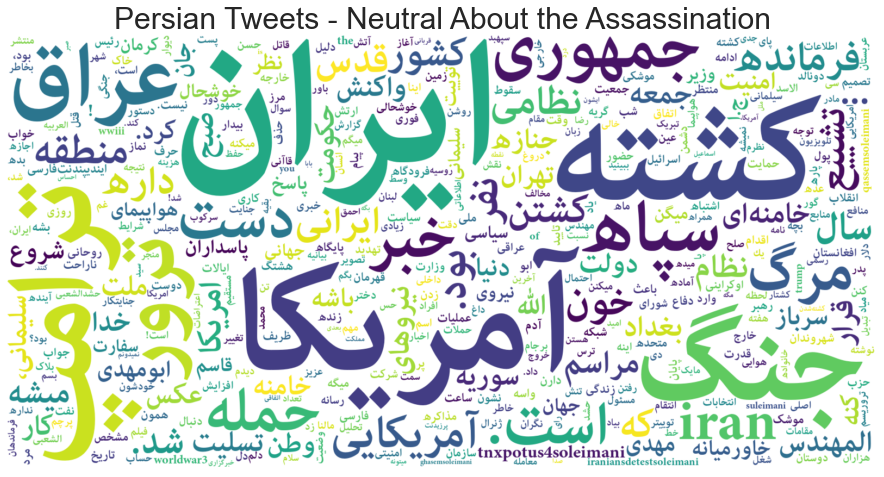

In [27]:
text = " ".join(review for review in df_fa_neu['cleaned_text'])
top_words = top_words_dict(txt=text, stop_words=stop_fa)
for_wc = take(400, top_words.items())
dic_data = reshape_data(for_wc)
plot_wordCloud(color="white", font_path='Data/fonts/adobe-arabic/AdobeArabic-Bold.otf', language='Persian', sentiment='Neutral About', data=dic_data)